In [1]:
import jax
import jax.numpy as jnp
import os
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"

Consider the parametric polynomial

$f(x)= x^{14}  +(t^{5}+i t^{2}+t+5) x^{10} + (t^{2}+1) x^{5} + 2 $

In [2]:
@jax.jit
def polynomial(ts,a):
    coeffs = lambda t: jnp.array([a,0,0,0,(a*t**5 - 12j*t**2 -1),0,0,0,0,(a*t**3+5*t**2 - 1),0,0,0,0,-6*abs(t)])
    func1=jax.vmap(lambda t,a: jnp.roots(coeffs(t,a),strip_zeros=False))
    func2=jax.vmap(lambda a:func1(ts,a))
    return jnp.nan_to_num(func2(a))
    

In [3]:
from jax import random
key = random.key(42)
key2 = random.key(84)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [4]:
def polynomial_coeffs(t, a):
    return jnp.array([a, (a**2), (-a)**3, 0, (5*a*t**5 - 1.2*a*1j*t**2 - 1), 0, 0, a**2-a, 0, (a*t**3 + a*t**2 - 2), 0, 5*a-1, t**2, 0, -t])

def compute_roots_for_single_a(a, ts):
    def roots_for_single_t(t):
        coeffs = polynomial_coeffs(t, a)
        return jnp.roots(coeffs, strip_zeros=False)
    
    return jax.vmap(roots_for_single_t)(ts)

@jax.jit
def polynomial(ts, as_):
    return jnp.nan_to_num(jax.vmap(lambda a: compute_roots_for_single_a(a, ts))(as_))

In [5]:
import numpy as np
result=[]
j=0
while j<2:
    x=random.uniform(key, shape=(50000,))
    y=random.uniform(key2, shape=(50000,))
    a=jnp.linspace(-1+j,-0.9+j,25)
    z=x+1j*y
    j+=0.1
    one=polynomial(z,a)
    result.append(np.array(one))
    print(j)
answer=np.concatenate(result,axis=0)


0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7
0.7999999999999999
0.8999999999999999
0.9999999999999999
1.0999999999999999
1.2
1.3
1.4000000000000001
1.5000000000000002
1.6000000000000003
1.7000000000000004
1.8000000000000005
1.9000000000000006
2.0000000000000004


The plot is nice, I want to include more points and make the visualization nicer, in a similar way to the tweet

In [6]:
answer=np.concatenate(result,axis=0)

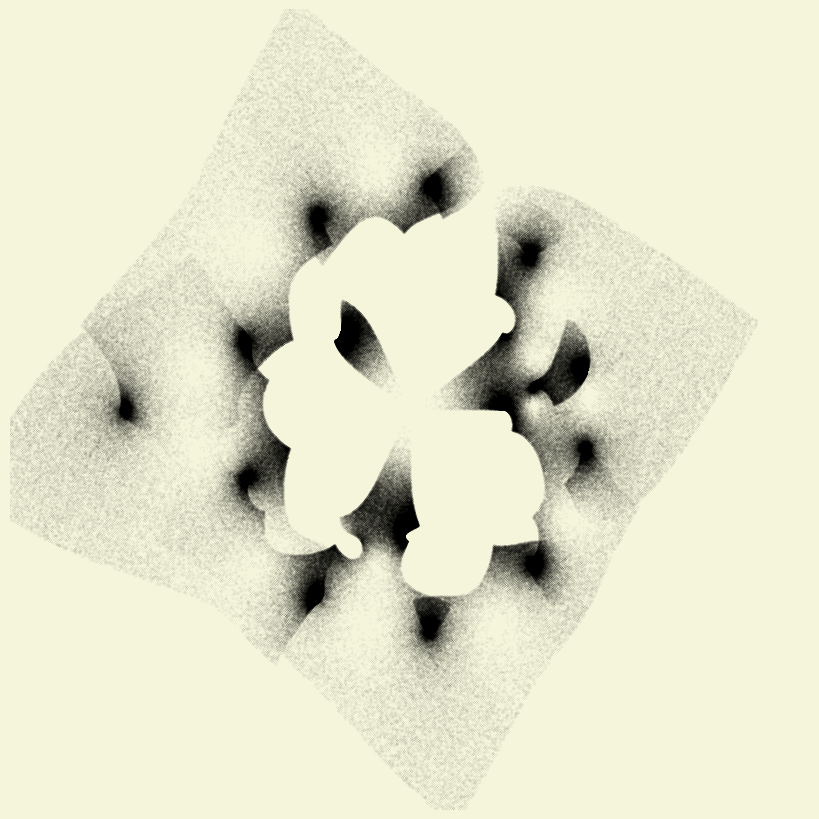

In [8]:
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
# Assuming 'one' is your array of roots from the polynomial function
# If it's not defined, you'll need to calculate it using your polynomial function

fig, ax = plt.subplots(figsize=(8, 8))
scatter = ax.scatter([], [], s=0.0005,color='k')

# Set the axis limits (adjust these based on your data)
#ax.set_xlim(jnp.real(one).min() - 0.1, jnp.real(one).max() + 0.1)
#ax.set_ylim(jnp.imag(one).min() - 0.1, jnp.imag(one).max() + 0.1)
al=2.4
b=2
ax.set_xlim(-al - 0.01*al, al + 0.01*al)
ax.set_ylim(-b- 0.01*b, b + 0.01*b)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
fig.patch.set_facecolor('beige')  # Figure background color
ax.set_facecolor('beige')       # Axes background color
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

def animate(frame):
    one2 = jnp.array(answer[frame]).flatten()
    scatter.set_offsets(jnp.column_stack((jnp.real(one2), jnp.imag(one2))))
    return scatter,

anim = FuncAnimation(fig, animate, frames=len(answer), interval=5, blit=True)

# Uncomment the next line to save the animation
anim.save('polynomial_roots.gif', writer='pillow', fps=50)

plt.show()

TODO:

- Make animation prettier perhaps with manim
- Use the polynomial from the tweets or something prettier
- Make another file with some fractal
- Refactor the polynomial code so you get some jax practice